In [1]:
from glob import glob
from natsort import natsorted
import numpy as np

In [2]:
OUTPUT_DIR = "output/20231030103142/"

In [3]:
metrics_files = natsorted(glob(f"{OUTPUT_DIR}*/*/*/metrics.npz"))

In [4]:
metrics_files

['output/20231030103142/cnn/PA/results/metrics.npz',
 'output/20231030103142/cnn/PAUS/results/metrics.npz',
 'output/20231030103142/cnn/US/results/metrics.npz',
 'output/20231030103142/densenet/PA/results/metrics.npz',
 'output/20231030103142/densenet/PAUS/results/metrics.npz',
 'output/20231030103142/densenet/US/results/metrics.npz',
 'output/20231030103142/swin/PA/results/metrics.npz',
 'output/20231030103142/swin/PAUS/results/metrics.npz',
 'output/20231030103142/swin/US/results/metrics.npz',
 'output/20231030103142/vit/PA/results/metrics.npz',
 'output/20231030103142/vit/PAUS/results/metrics.npz',
 'output/20231030103142/vit/US/results/metrics.npz']

In [5]:
metrics = {}

for metrics_file in metrics_files:
    modality = metrics_file.split("/")[-3]
    model_name = metrics_file.split("/")[-4]
    
    saved_metrics = np.load(metrics_file)
    metrics[(modality, model_name)] = {"tpr":saved_metrics["tpr"], "fpr":saved_metrics["fpr"], "thresholds":saved_metrics["thresholds"], "roc_auc":saved_metrics["roc_auc"]}

In [6]:
metrics

{('PA', 'cnn'): {'tpr': array([0., 1.]),
  'fpr': array([0., 1.]),
  'thresholds': array([inf,  0.], dtype=float32),
  'roc_auc': array(0.5)},
 ('PAUS', 'cnn'): {'tpr': array([0., 1.]),
  'fpr': array([0., 1.]),
  'thresholds': array([inf,  1.], dtype=float32),
  'roc_auc': array(0.5)},
 ('US', 'cnn'): {'tpr': array([0., 1.]),
  'fpr': array([0., 1.]),
  'thresholds': array([inf,  1.], dtype=float32),
  'roc_auc': array(0.5)},
 ('PA',
  'densenet'): {'tpr': array([0.        , 0.00190114, 0.00380228, ..., 0.99619772, 0.99809886,
         1.        ]), 'fpr': array([0., 0., 0., ..., 1., 1., 1.]), 'thresholds': array([       inf,   9.938066,   9.810836, ..., -10.38497 , -10.437277,
         -10.825847], dtype=float32), 'roc_auc': array(0.63158026)},
 ('PAUS', 'densenet'): {'tpr': array([0., 0., 0., ..., 1., 1., 1.]),
  'fpr': array([0.        , 0.00186916, 0.00373832, ..., 0.99626168, 0.99813084,
         1.        ]),
  'thresholds': array([        inf,  -1.194838 ,  -1.6505268, ..., -45

In [7]:
labels = []
all_fpr = []
all_tpr = []
all_thresholds = []
all_roc_auc = []

for key, saved_met_dict in metrics.items():
    modality, model_name = key
    label = f"{modality} - {model_name}"
    
    fpr = saved_met_dict["fpr"]
    tpr = saved_met_dict["tpr"]
    thresholds = saved_met_dict["thresholds"]
    roc_auc = saved_met_dict["roc_auc"]

    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_thresholds.append(thresholds)
    all_roc_auc.append(roc_auc)
    labels.append(label)


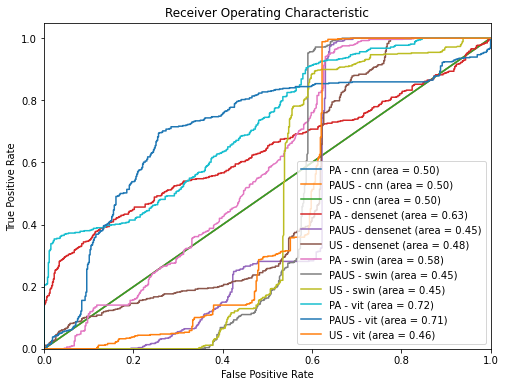

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.plot(all_fpr[i], all_tpr[i], label=f"{labels[i]} (area = {all_roc_auc[i]:0.2f})")
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('all_roc_curves.png')  # Save the combined ROC curves
plt.show()  # Display the combined ROC curves